In [1]:
%reload_ext autoreload

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys, os
import extract as e
import structure as s
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime

In [4]:
from plotting import plots

In [5]:
import dfconvert as dfC
from dfconvert import df_store

Ipython active


In [6]:
df = df_store('c').load_df()
print(df.head())


Loading pickle: data\c...
dataframe loaded successfully
                 date       d1       d2       d3       d4    v
0 2016-01-03 17:00:00  0.73739  0.73739  0.73736  0.73736  0.0
1 2016-01-03 17:01:00  0.73736  0.73736  0.73735  0.73735  0.0
2 2016-01-03 17:02:00  0.73735  0.73735  0.73735  0.73735  0.0
3 2016-01-03 17:03:00  0.73744  0.73744  0.73744  0.73744  0.0
4 2016-01-03 17:04:00  0.73737  0.73737  0.73737  0.73737  0.0


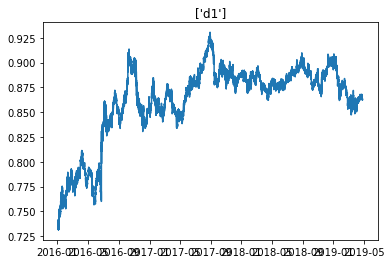

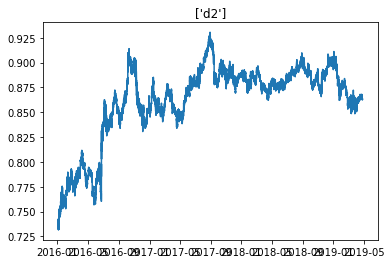

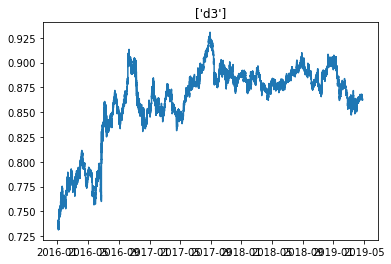

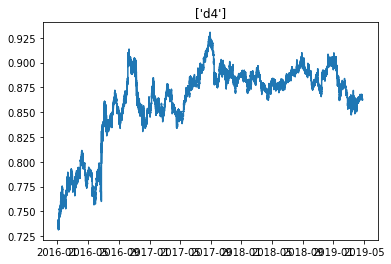

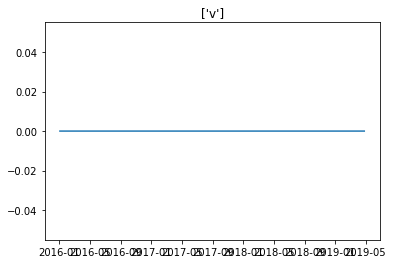

In [7]:
plots(df, None)

In [8]:
df.mean(numeric_only=True, axis=0)

d1    0.857583
d2    0.857624
d3    0.857541
d4    0.857582
v     0.000000
dtype: float32

In [81]:
subset = df.iloc[:10000].reset_index()
subset.head()

,index,date,d1,d2,d3,d4,v
0,0,2016-01-03 17:00:00,0.73739,0.73739,0.73736,0.73736,0.0
1,1,2016-01-03 17:01:00,0.73736,0.73736,0.73735,0.73735,0.0
2,2,2016-01-03 17:02:00,0.73735,0.73735,0.73735,0.73735,0.0
3,3,2016-01-03 17:03:00,0.73744,0.73744,0.73744,0.73744,0.0
4,4,2016-01-03 17:04:00,0.73737,0.73737,0.73737,0.73737,0.0


In [82]:
subset = s.date_split(subset, 'date')


In [83]:
subset.head()

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays
0,0,2016-01-03 17:00:00,0.73739,0.73739,0.73736,0.73736,0.0,2016,1,53,...,3,False,False,False,False,False,False,1,0,3
1,1,2016-01-03 17:01:00,0.73736,0.73736,0.73735,0.73735,0.0,2016,1,53,...,3,False,False,False,False,False,False,0,0,3
2,2,2016-01-03 17:02:00,0.73735,0.73735,0.73735,0.73735,0.0,2016,1,53,...,3,False,False,False,False,False,False,0,0,3
3,3,2016-01-03 17:03:00,0.73744,0.73744,0.73744,0.73744,0.0,2016,1,53,...,3,False,False,False,False,False,False,0,0,3
4,4,2016-01-03 17:04:00,0.73737,0.73737,0.73737,0.73737,0.0,2016,1,53,...,3,False,False,False,False,False,False,0,0,3


In [84]:
subset = s.add_rand(subset)
subset.head()

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,randseries
0,0,2016-01-03 17:00:00,0.73739,0.73739,0.73736,0.73736,0.0,2016,1,53,...,False,False,False,False,False,False,1,0,3,0.886286
1,1,2016-01-03 17:01:00,0.73736,0.73736,0.73735,0.73735,0.0,2016,1,53,...,False,False,False,False,False,False,0,0,3,0.146074
2,2,2016-01-03 17:02:00,0.73735,0.73735,0.73735,0.73735,0.0,2016,1,53,...,False,False,False,False,False,False,0,0,3,0.395692
3,3,2016-01-03 17:03:00,0.73744,0.73744,0.73744,0.73744,0.0,2016,1,53,...,False,False,False,False,False,False,0,0,3,0.381714
4,4,2016-01-03 17:04:00,0.73737,0.73737,0.73737,0.73737,0.0,2016,1,53,...,False,False,False,False,False,False,0,0,3,0.699817


In [85]:
subset['mean'] = subset.mean(numeric_only=True, axis=1)


In [86]:
subset.head()

,index,date,d1,d2,d3,d4,v,Year,Month,Week,...,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,randseries,mean
0,0,2016-01-03 17:00:00,0.73739,0.73739,0.73736,0.73736,0.0,2016,1,53,...,False,False,False,False,False,1,0,3,0.886286,94.992536
1,1,2016-01-03 17:01:00,0.73736,0.73736,0.73735,0.73735,0.0,2016,1,53,...,False,False,False,False,False,0,0,3,0.146074,94.958886
2,2,2016-01-03 17:02:00,0.73735,0.73735,0.73735,0.73735,0.0,2016,1,53,...,False,False,False,False,False,0,0,3,0.395692,95.015686
3,3,2016-01-03 17:03:00,0.73744,0.73744,0.73744,0.73744,0.0,2016,1,53,...,False,False,False,False,False,0,0,3,0.381714,95.060522
4,4,2016-01-03 17:04:00,0.73737,0.73737,0.73737,0.73737,0.0,2016,1,53,...,False,False,False,False,False,0,0,3,0.699817,95.120423


In [87]:
features = pd.get_dummies(subset)

In [88]:
features.iloc[:, 5:14].head()

,d4,v,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end
0,0.73736,0.0,2016,1,53,3,6,3,False
1,0.73735,0.0,2016,1,53,3,6,3,False
2,0.73735,0.0,2016,1,53,3,6,3,False
3,0.73744,0.0,2016,1,53,3,6,3,False
4,0.73737,0.0,2016,1,53,3,6,3,False


In [89]:
def drop_col(df, col_names):
    for col in col_names:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

features = drop_col(features, ['date', 'd2', 'd3', 'd4', 'index'])

In [124]:
features.head()

array([[0.0, 2016, 1, ..., 3, 0.8862863826400069, 94.99253574306154],
       [0.0, 2016, 1, ..., 3, 0.14607386526016408, 94.95888608366094],
       [0.0, 2016, 1, ..., 3, 0.39569168196031057, 95.01568598318546],
       ...,
       [0.0, 2016, 1, ..., 12, 0.6547810177450637, 548.0300555000723],
       [0.0, 2016, 1, ..., 12, 0.3862239270541966, 548.0633029050409],
       [0.0, 2016, 1, ..., 12, 0.6344968102529516, 548.12003939812]],
      dtype=object)

In [91]:
if 'd1' in features:
    labels = np.array(features['d1'])
    features = features.drop('d1', axis = 1)
elif 'rnd' in features:
    labels = np.array(features['rnd'])
    features = features.drop('rnd', axis = 1)

feature_list = list(features.columns)
print(feature_list)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=42)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

['v', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'not_dupym', 'daysinmonth', 'aggdays', 'randseries', 'mean']
(7500, 18)
(2500, 18)
(7500,)
(2500,)


In [112]:
#historical average
baseline_preds = test_features[:,feature_list.index('mean')]
print(baseline_preds)
baseline_errors = abs(baseline_preds - test_labels)
baseline_errors[:10]


[377.36223335885734 305.71980227953924 171.09265758824142 ...
 441.00530342629685 418.6688749785378 98.25666878661697]


array([376.61796333217353, 304.98033227450384, 170.3574875814894,
       307.79294558334544, 297.55286462027163, 380.6138890195365,
       117.86327928400937, 328.6773398933494, 381.6620949878705,
       111.64230904252283], dtype=object)

In [113]:
print('av basline error: ', round(np.mean(baseline_errors), 2))


av basline error:  317.11


In [114]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=5, max_depth=50, n_jobs=-1)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('mean absolute error: ', np.mean(errors), 'degrees.')


mean absolute error:  0.0001959769189431144 degrees.


In [115]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('accuracy:', round(accuracy, 2), '%.')

accuracy: 99.97 %.


In [116]:
importances = list(rf.feature_importances_)
print(importances)
feature_importances = [(feature, importance) for feature, importance in zip (feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('variable: {:20} importance : {}'.format(*pair)) for pair in feature_importances]

[0.0, 0.0, 0.0, 0.00010076412163481912, 6.597395899082263e-05, 0.02416980544204355, 8.566132278002954e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.094028234159191e-05, 0.9755568548722092]
variable: mean                 importance : 0.9755568548722092
variable: Dayofweek            importance : 0.02416980544204355
variable: Week                 importance : 0.00010076412163481912
variable: Dayofyear            importance : 8.566132278002954e-05
variable: Day                  importance : 6.597395899082263e-05
variable: randseries           importance : 2.094028234159191e-05
variable: v                    importance : 0.0
variable: Year                 importance : 0.0
variable: Month                importance : 0.0
variable: Is_month_end         importance : 0.0
variable: Is_month_start       importance : 0.0
variable: Is_quarter_end       importance : 0.0
variable: Is_quarter_start     importance : 0.0
variable: Is_year_end          importance : 0.0
variable: Is_year_start      

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [117]:
important_indices = [feature_list.index('Dayofweek'), feature_list.index('mean')]
train_important=train_features[:,important_indices]
test_important=test_features[:,important_indices]
rf.fit(train_important, train_labels)
predictions= rf.predict(test_important)
errors = abs(predictions-test_labels)
print(errors)

[4.90613913e-04 1.25151610e-04 2.77890481e-05 ... 1.22879490e-04
 8.05876350e-05 3.65088610e-04]


In [118]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'var importance')

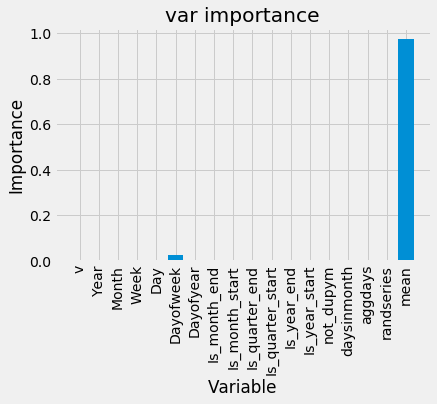

In [119]:
plt.style.use('fivethirtyeight')
x_values=list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('var importance')



In [107]:
years = test_features[:, feature_list.index('Year')]
months = test_features[:feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
print("YEARS: " , years)
print("MONTHS: " , months)
print("DAYS: " , days)



YEARS:  [2016 2016 2016 ... 2016 2016 2016]
MONTHS:  [[0.0 2016 1 1 8 4 8 False False False False False False 0 0 8
  0.992103915633057 377.36223335885734]
 [0.0 2016 1 1 6 2 6 False False False False False False 0 0 6
  0.8777000942637144 305.71980227953924]]
DAYS:  [8 6 4 ... 11 8 3]


In [133]:
test_features[:100, 'year']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [125]:
a=list(zip(years, months, days))
print(a)

[(2016, array([0.0, 2016, 1, 1, 8, 4, 8, False, False, False, False, False, False,
       0, 0, 8, 0.992103915633057, 377.36223335885734], dtype=object), 8), (2016, array([0.0, 2016, 1, 1, 6, 2, 6, False, False, False, False, False, False,
       0, 0, 6, 0.8777000942637144, 305.71980227953924], dtype=object), 6)]


In [104]:
test_dates = [str(int(year)) + '-' + str(int(month))+'-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.strftime(date, '%Y-%m-%d') for date in test_dates]
prediction_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:

plt.plot(prediction_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation  = '60')
plt.ylabel('date')
plt.xlabel('actual and predicted')